Harap selesaikan tugas2 dibawah ini:

*Muat data “diabetes.csv”

*Lakukan Exploratory Data Analysis

*Gunakan preset ‘best_quality’ dan metrik ‘accuracy’, latih model klasifikasi menggunakan AutoGluon untuk memprediksi kolom "Outcome".

*Evaluasi kinerja model terlatih dengan memplot leaderboard dan menunjukkan model terbaik. Buat confusion matrix.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Muat data “diabetes.csv"
diabetes_df = pd.read_csv("diabetes.csv")
#Lakukan Exploratory Data Analysis
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#instal autogluon
!pip install -U ipykernel

In [ ]:
!pip install -U pip
!pip intstall -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

In [1]:
#restart runtime notebook

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [13]:
#melihat hubungan glukosa dengan variabel lainnya
glucose_df = diabetes_df.groupby(by = 'Glucose').mean()
glucose_df.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,,,,,,,,
0,2.8,67.6,29.6,4.6,32.88,0.3802,28.6,0.4
44,5.0,62.0,0.0,0.0,25.00,0.5870,36.0,0.0
56,2.0,56.0,28.0,45.0,24.20,0.3320,22.0,0.0
57,4.5,70.0,18.5,0.0,27.25,0.4155,54.0,0.0
61,3.0,82.0,28.0,0.0,34.40,0.2430,46.0,0.0


In [ ]:
age_df = diabetes_df.groupby(by = 'Age').mean()
age_df

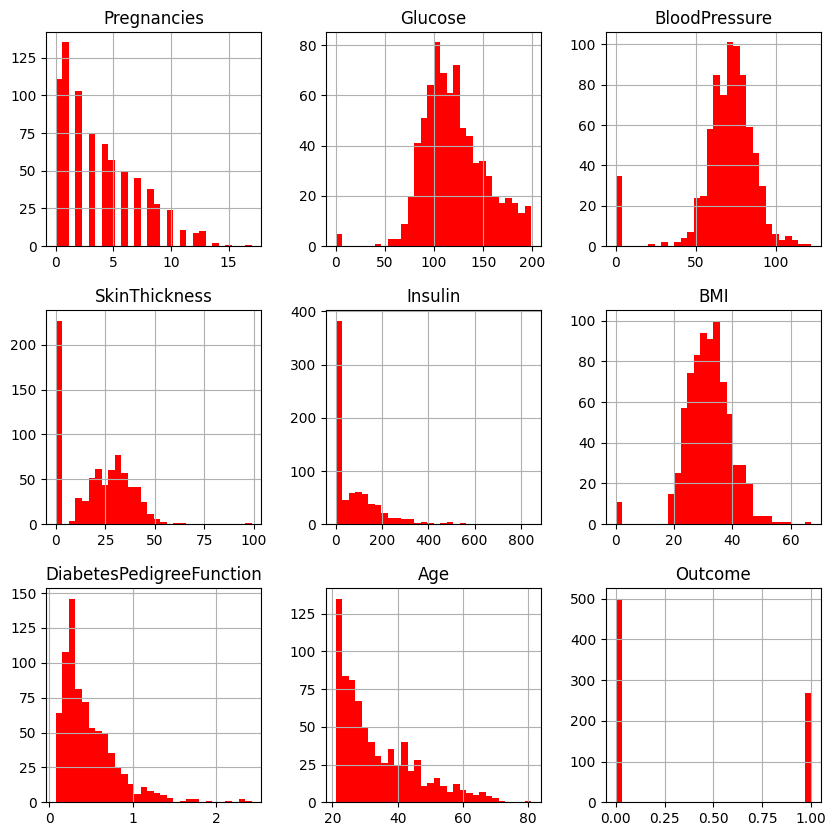

In [30]:
diabetes_df.hist(bins = 30, figsize = (10, 10), color = 'r')
plt.show()

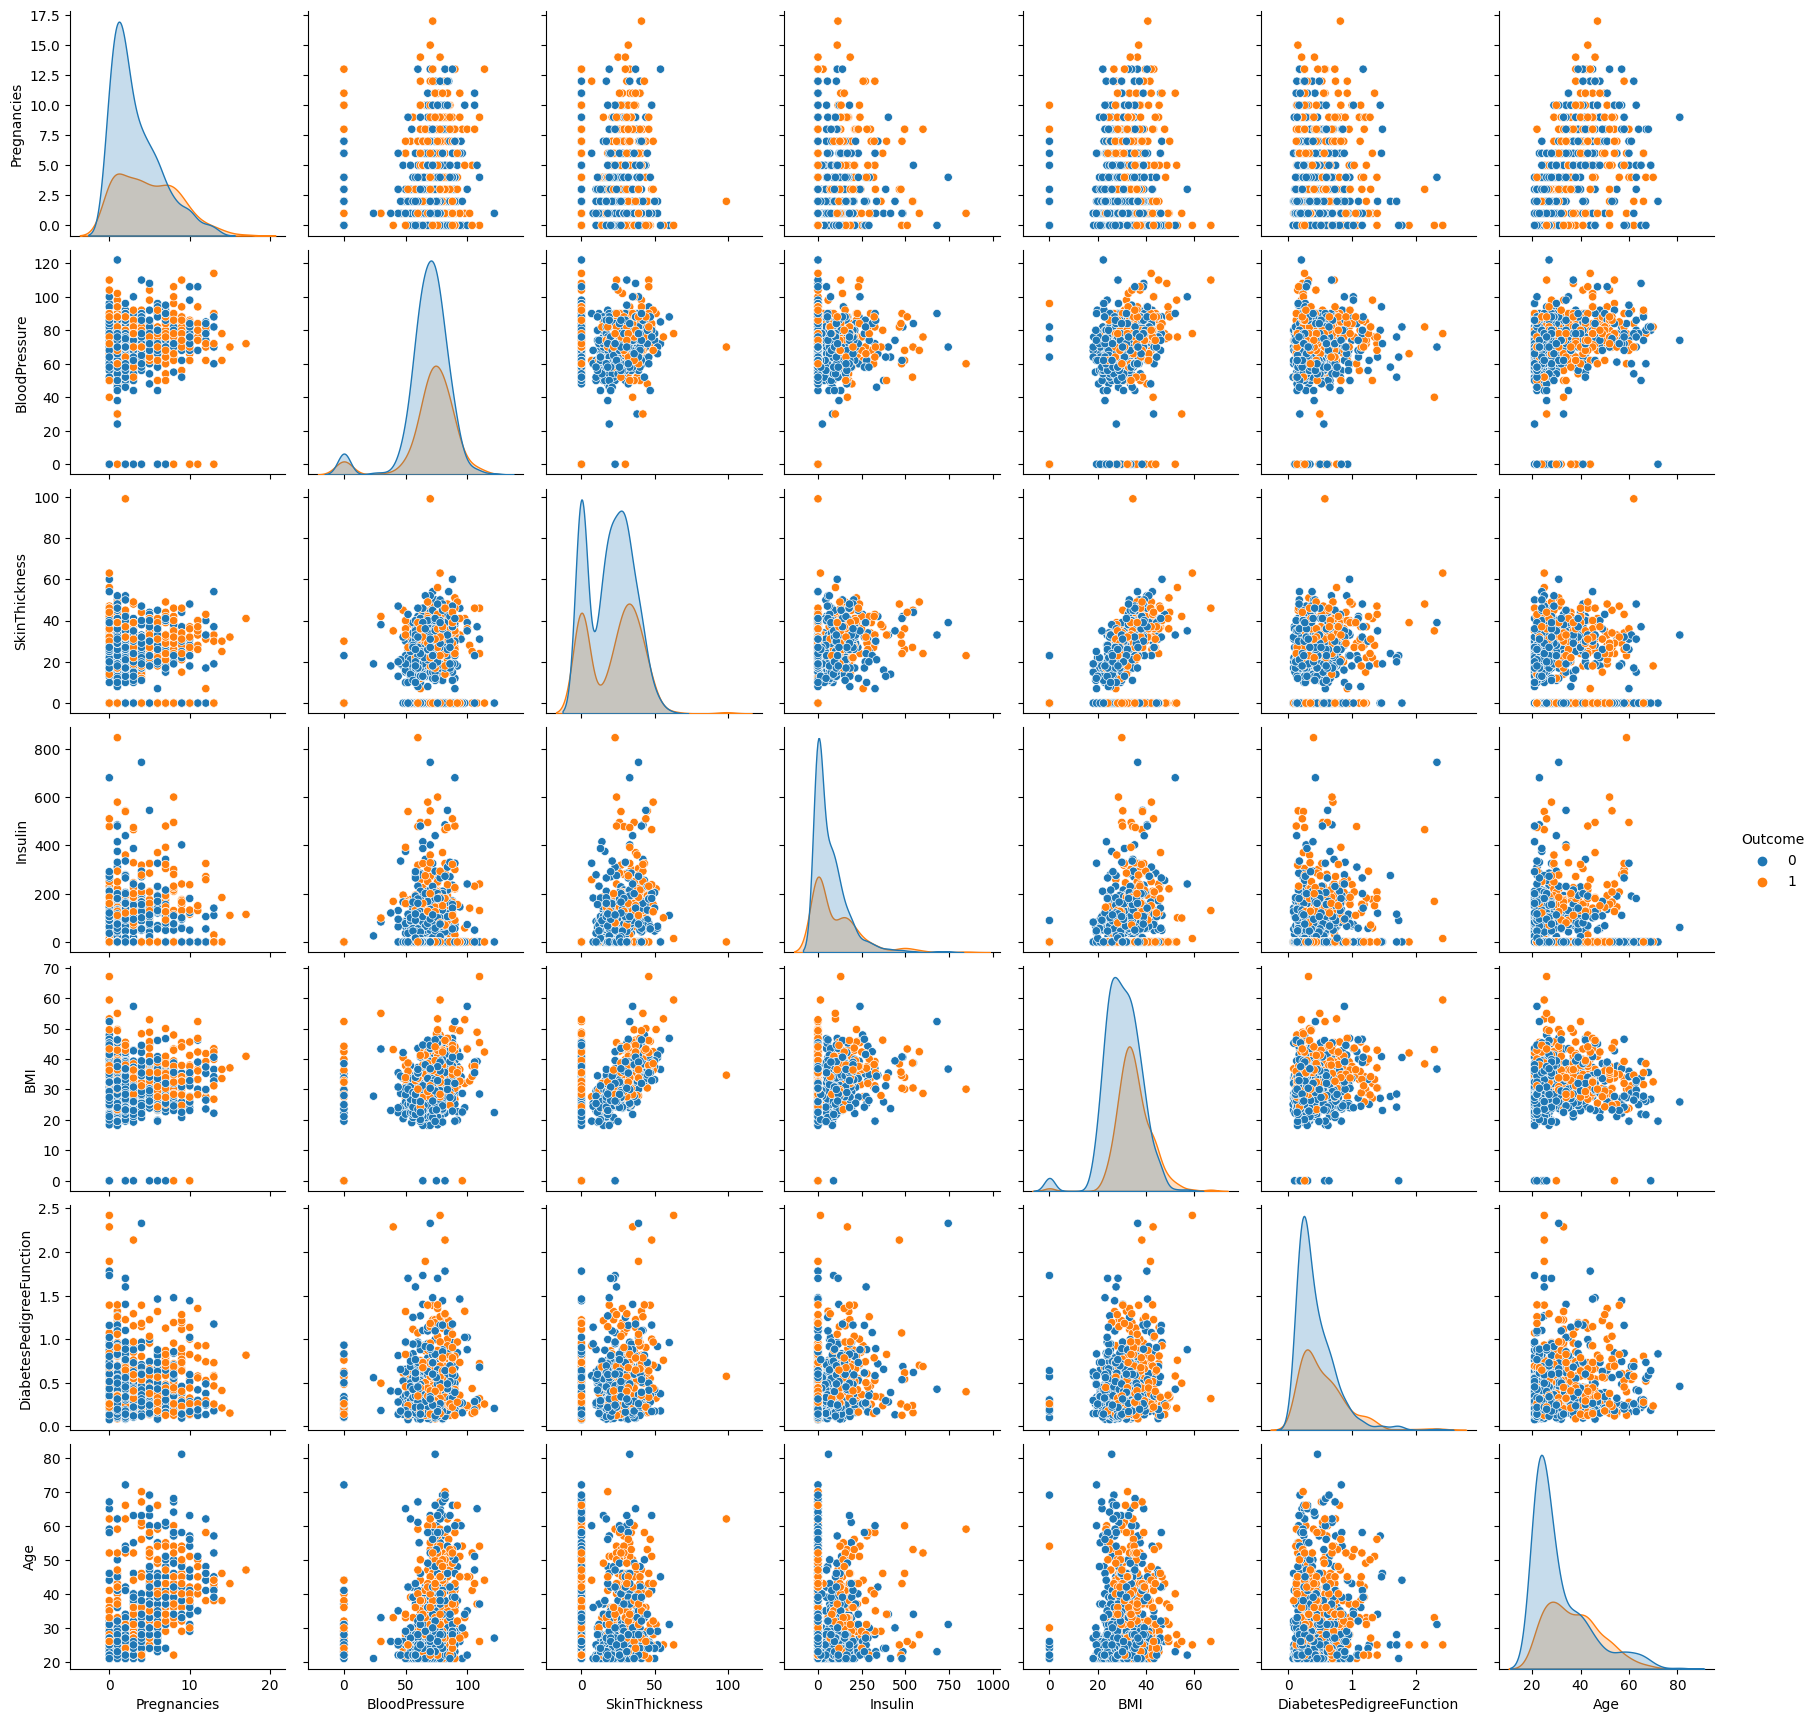

In [31]:
sns.pairplot(diabetes_df, hue = 'Outcome', vars = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

Berdasarkan pengamatan sekilas dari hasil pairplot dapat diketahui bahwa sebaran data outcome sangat bercampur sehingga akan sulit untuk melihat akurasinya.

<Axes: >

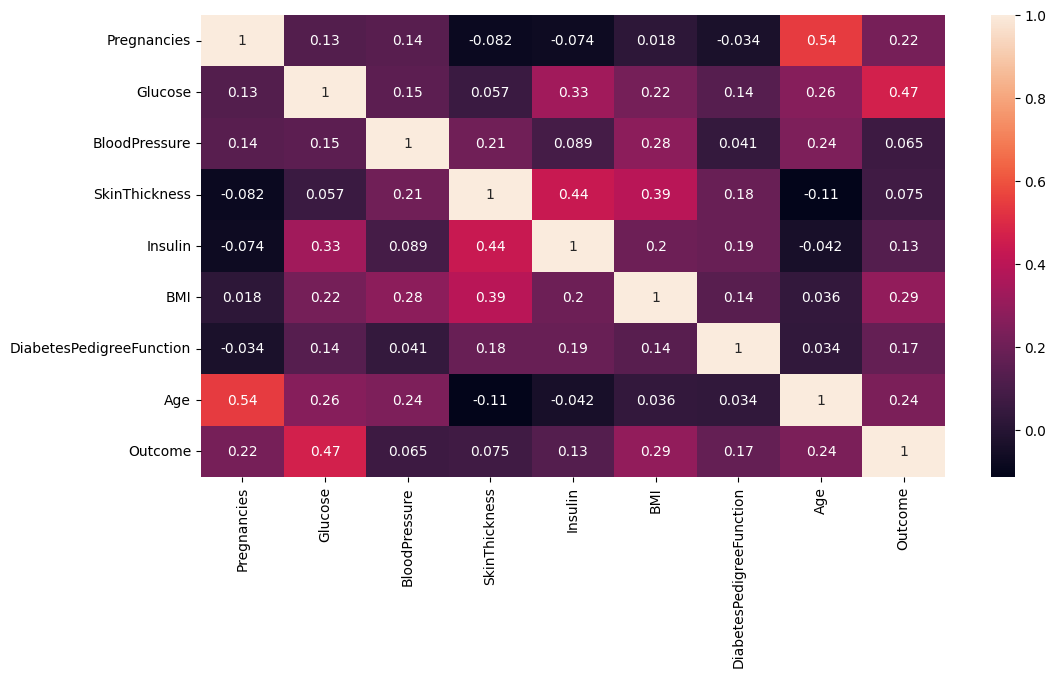

In [33]:
plt.figure(figsize = (12, 6))
sns.heatmap(diabetes_df.corr(), annot = True)

<Axes: xlabel='Outcome', ylabel='count'>

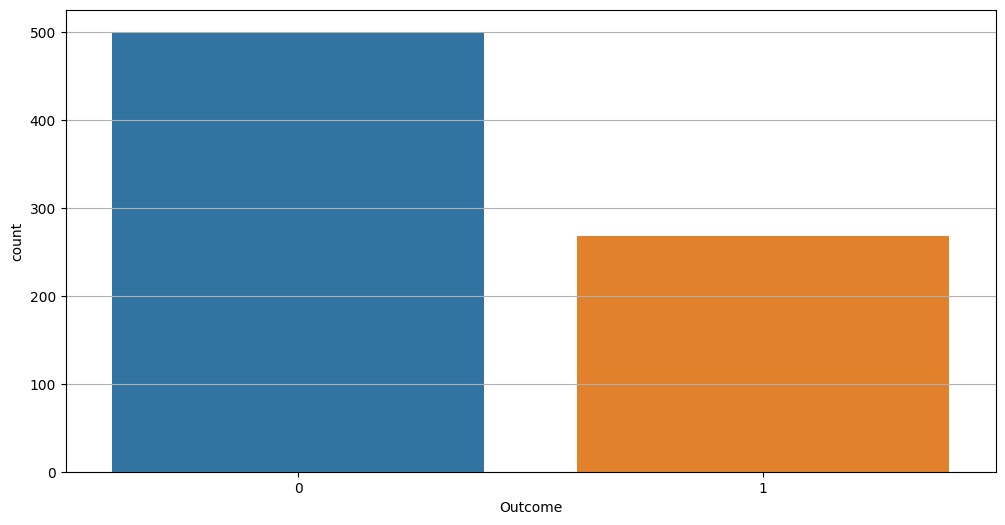

In [35]:
plt.figure(figsize = (12, 6))
plt.grid()
sns.countplot(x = 'Outcome', data = diabetes_df)

kelas outcome 0 = tidak terkena diabetes (500 orang)

kelas outcome 1 = terkena diabetes (268 orang)

In [25]:
#train model using autogluon
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(diabetes_df, test_size = 0.2, random_state = 0)
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [26]:
test_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


In [37]:
#latih model akurasi dengan autogluon
predictor = TabularPredictor(label = 'Outcome', problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = train_df, time_limit = 200, presets = 'best_quality')
#problem type binary karena untuk klasifikasi hasilnya hanya 0 tidak atau 1 ya
#eval_metric nya akurasi

No path specified. Models will be saved in: "AutogluonModels/ag-20230614_005152/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20230614_005152/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10359.74 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	S

In [38]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.222147  60.809029                0.003689           2.057703            2       True         13
1    NeuralNetFastAI_BAG_L1   0.788274       0.168359  37.463093                0.168359          37.463093            1       True         10
2           CatBoost_BAG_L1   0.781759       0.010880  31.891736                0.010880          31.891736            1       True          7
3         LightGBMXT_BAG_L1   0.780130       0.018600  25.356580                0.018600          25.356580            1       True          3
4           LightGBM_BAG_L1   0.780130       0.021081  24.141121                0.021081          24.141121            1       True          4
5            XGBoost_BAG_L1   0.773616       0.050100  21.288233                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7003257328990228,
  'KNeighborsDist_BAG_L1': 0.6970684039087948,
  'LightGBMXT_BAG_L1': 0.7801302931596091,
  'LightGBM_BAG_L1': 0.7801302931596091,
  'RandomForestGini_BAG_L1': 0.745928338762215,
  'RandomF

In [39]:
#Evaluasi kinerja model terlatih dengan memplot leaderboard dan menunjukkan model terbaik. Buat confusion matrix.
predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.222147  60.809029                0.003689           2.057703            2       True         13
1    NeuralNetFastAI_BAG_L1   0.788274       0.168359  37.463093                0.168359          37.463093            1       True         10
2           CatBoost_BAG_L1   0.781759       0.010880  31.891736                0.010880          31.891736            1       True          7
3         LightGBMXT_BAG_L1   0.780130       0.018600  25.356580                0.018600          25.356580            1       True          3
4           LightGBM_BAG_L1   0.780130       0.021081  24.141121                0.021081          24.141121            1       True          4
5            XGBoost_BAG_L1   0.773616       0.050100  21.288233                0.050100          21.288233            1       True         11

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.793160,0.222147,60.809029,0.003689,2.057703,2,True,13
1,NeuralNetFastAI_BAG_L1,0.788274,0.168359,37.463093,0.168359,37.463093,1,True,10
2,CatBoost_BAG_L1,0.781759,0.010880,31.891736,0.010880,31.891736,1,True,7
3,LightGBMXT_BAG_L1,0.780130,0.018600,25.356580,0.018600,25.356580,1,True,3
4,LightGBM_BAG_L1,0.780130,0.021081,24.141121,0.021081,24.141121,1,True,4
5,XGBoost_BAG_L1,0.773616,0.050100,21.288233,0.050100,21.288233,1,True,11
6,NeuralNetTorch_BAG_L1,0.763844,0.131269,30.665834,0.131269,30.665834,1,True,12
7,RandomForestEntr_BAG_L1,0.757329,0.195514,1.463996,0.195514,1.463996,1,True,6
8,RandomForestGini_BAG_L1,0.745928,0.273022,1.573004,0.273022,1.573004,1,True,5
9,ExtraTreesGini_BAG_L1,0.741042,0.215403,0.816484,0.215403,0.816484,1,True,8


                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.222147  60.809029                0.003689           2.057703            2       True         13
1    NeuralNetFastAI_BAG_L1   0.788274       0.168359  37.463093                0.168359          37.463093            1       True         10
2           CatBoost_BAG_L1   0.781759       0.010880  31.891736                0.010880          31.891736            1       True          7
3         LightGBMXT_BAG_L1   0.780130       0.018600  25.356580                0.018600          25.356580            1       True          3
4           LightGBM_BAG_L1   0.780130       0.021081  24.141121                0.021081          24.141121            1       True          4
5            XGBoost_BAG_L1   0.773616       0.050100  21.288233                0.050100          21.288233            1       True         11

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'WeightedEnsemble_L2'),
  Text(1, 0, 'NeuralNetFastAI_BAG_L1'),
  Text(2, 0, 'CatBoost_BAG_L1'),
  Text(3, 0, 'LightGBMXT_BAG_L1'),
  Text(4, 0, 'LightGBM_BAG_L1'),
  Text(5, 0, 'XGBoost_BAG_L1'),
  Text(6, 0, 'NeuralNetTorch_BAG_L1'),
  Text(7, 0, 'RandomForestEntr_BAG_L1'),
  Text(8, 0, 'RandomForestGini_BAG_L1'),
  Text(9, 0, 'ExtraTreesGini_BAG_L1'),
  Text(10, 0, 'ExtraTreesEntr_BAG_L1'),
  Text(11, 0, 'KNeighborsUnif_BAG_L1'),
  Text(12, 0, 'KNeighborsDist_BAG_L1')])

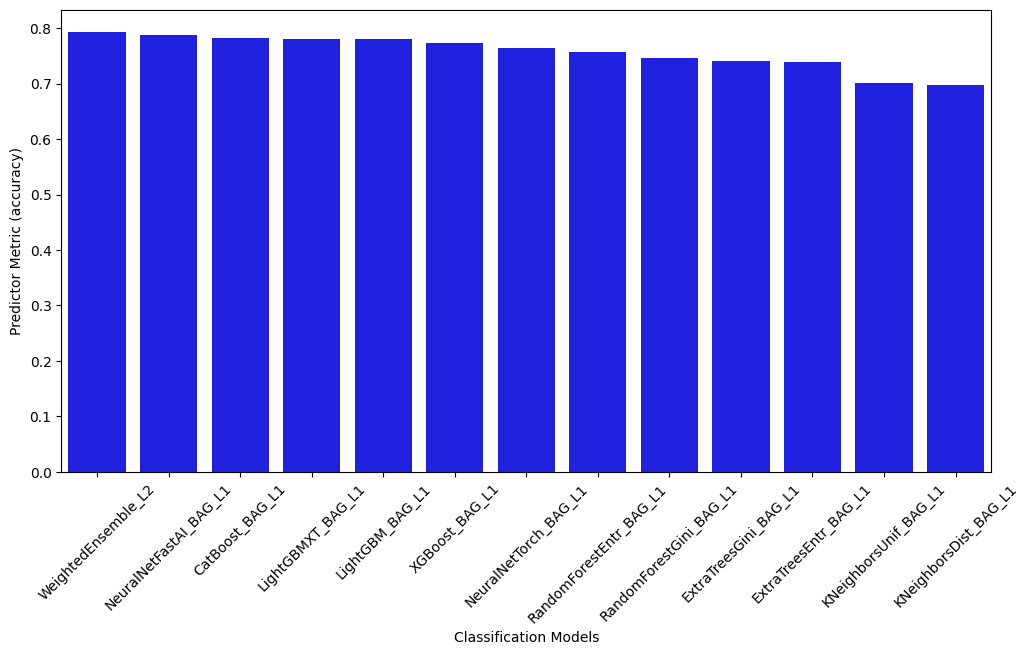

In [41]:
#inisialisasi figure matplotlib
f, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = 'model', y = 'score_val', data = predictor.leaderboard(), color = 'b')
ax.set(ylabel = 'Predictor Metric (accuracy)', xlabel = 'Classification Models')
plt.xticks(rotation = 45)

In [42]:
predictor.evaluate(test_df)

Evaluation: accuracy on test data: 0.8311688311688312
Evaluations on test data:
{
    "accuracy": 0.8311688311688312,
    "balanced_accuracy": 0.7890236627560151,
    "mcc": 0.5933466528277093,
    "roc_auc": 0.86438655796381,
    "f1": 0.711111111111111,
    "precision": 0.7441860465116279,
    "recall": 0.6808510638297872
}


{'accuracy': 0.8311688311688312,
 'balanced_accuracy': 0.7890236627560151,
 'mcc': 0.5933466528277093,
 'roc_auc': 0.86438655796381,
 'f1': 0.711111111111111,
 'precision': 0.7441860465116279,
 'recall': 0.6808510638297872}

In [43]:
y_pred = predictor.predict(test_df)
print('Predictions :', list(y_pred)[:5])

Predictions : [1, 0, 0, 1, 0]


In [44]:
y_test = test_df['Outcome']
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

<Axes: >

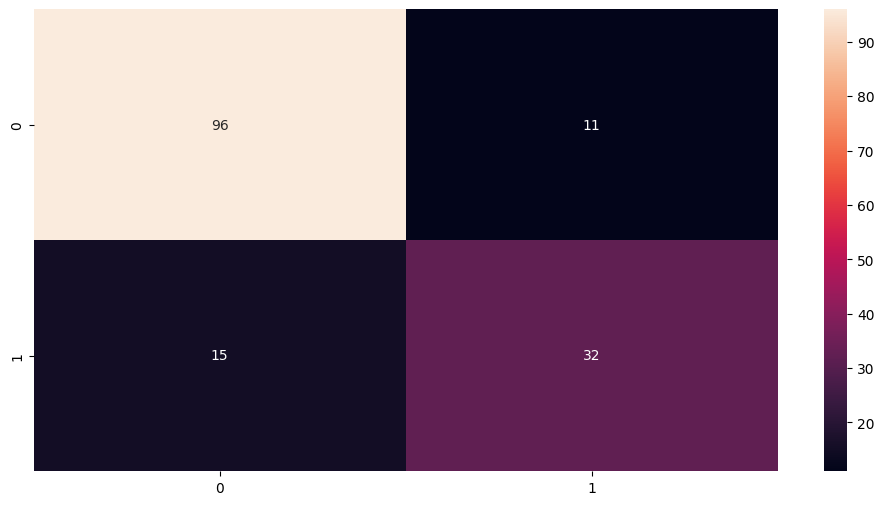

In [46]:
#performa pada data latih
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (12, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.68      0.71        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



In [ ]:
#FINISH